## `Importing Essential Libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tweet_data = pd.read_excel('Downloads/Tweet_NFT.xlsx') # Reading the CSV file for the analysis 

In [3]:
tweet_data.head() # Provides view of the first 5 columns present in the dataset

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762.0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763.0,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765.0,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766.0,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767.0,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community


## `Performing Exploratory Data Analysis`

In [4]:
tweet_data.shape # Shows the number of rows and columns present in the dataset

(127453, 4)

In [5]:
# Checking the number of null values in the dataset. It can be seen that there are 31089 null values in tweet_intent column
tweet_data.isnull().sum() 

id                      0
tweet_text              0
tweet_created_at        0
tweet_intent        31089
dtype: int64

In [6]:
# Using the ffill method to fill the null values with immediate upper value of the rows containing nan 
tweet_data.fillna(method='ffill',inplace=True)

In [7]:
tweet_data.isnull().sum()

id                  0
tweet_text          0
tweet_created_at    0
tweet_intent        0
dtype: int64

In [8]:
# Dropping unneccesary columns 
tweet_data.drop(['id','tweet_created_at'],axis=1,inplace=True)

In [9]:
tweet_data.head()

,tweet_text,tweet_intent
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,Community
1,Need Sick Character artâ_x009d_“#art #artist #...,Giveaway
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,Appreciation
3,@CryptoBatzNFT @DarekBTW The first project in ...,Community
4,@sashadysonn The first project in crypto with ...,Community


C:\Users\mdfai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tweet_intent', ylabel='count'>

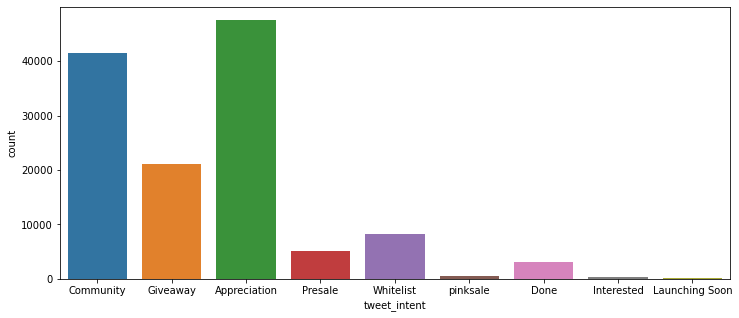

In [10]:
# Visualising the number of categorical values present in tweet_intent column 
plt.figure(figsize=(12,5))
sns.countplot(tweet_data['tweet_intent'])

## `Text Analysis`

In [11]:
tweet_data['tweet_text'] = tweet_data['tweet_text'].apply(lambda x: x.lower()) # Lowering down the case of all the tweets

In [12]:
tweet_data['tweet_text'].head() # It can be observed that all the tweets have been converted into lowercase

0    @crypto_brody @ecology1990 @moonrunnersnft @it...
1    need sick character artâ_x009d_“#art #artist #...
2    @the_hulk_nft @inagotchinft @tesla @killabears...
3    @cryptobatznft @darekbtw the first project in ...
4    @sashadysonn the first project in crypto with ...
Name: tweet_text, dtype: object

In [13]:
# Removing the Punctuation marks present in the tweets 
import string 
def remove_puntuation(data):
    tweet = ''.join([i for i in data if i not in string.punctuation])
    return tweet

In [14]:
tweet_data['tweet_text'] = tweet_data['tweet_text'].apply(lambda x: remove_puntuation(x))

In [15]:
tweet_data['tweet_text'].head()

0    cryptobrody ecology1990 moonrunnersnft itsukin...
1    need sick character artâx009d“art artist artis...
2    thehulknft inagotchinft tesla killabearsnft el...
3    cryptobatznft darekbtw the first project in cr...
4    sashadysonn the first project in crypto with m...
Name: tweet_text, dtype: object

In [16]:
# Removing spaces 
tweet_data['tweet_text'] = tweet_data['tweet_text'].str.replace('[^\w\s]','')

C:\Users\mdfai\AppData\Local\Temp/ipykernel_14412/435505105.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_data['tweet_text'] = tweet_data['tweet_text'].str.replace('[^\w\s]','')


In [17]:
tweet_data['tweet_text'].head()

0    cryptobrody ecology1990 moonrunnersnft itsukin...
1    need sick character artâx009dart artist artist...
2    thehulknft inagotchinft tesla killabearsnft el...
3    cryptobatznft darekbtw the first project in cr...
4    sashadysonn the first project in crypto with m...
Name: tweet_text, dtype: object

In [18]:
tweet_data['tweet_text'] = tweet_data['tweet_text'].replace('\d','')

In [19]:
tweet_data['tweet_text'].head()

0    cryptobrody ecology1990 moonrunnersnft itsukin...
1    need sick character artâx009dart artist artist...
2    thehulknft inagotchinft tesla killabearsnft el...
3    cryptobatznft darekbtw the first project in cr...
4    sashadysonn the first project in crypto with m...
Name: tweet_text, dtype: object

In [20]:
# Eliminating words called as stopwords that would not add much value to the model
from nltk.corpus import stopwords
import nltk
sw = stopwords.words('english')
tweet_data['tweet_text'] = tweet_data['tweet_text'].apply(lambda x: ' '.join([i for i in x.split() if i not in sw]))

In [21]:
tweet_data['tweet_text'].head()

0    cryptobrody ecology1990 moonrunnersnft itsukin...
1    need sick character artâx009dart artist artist...
2    thehulknft inagotchinft tesla killabearsnft el...
3    cryptobatznft darekbtw first project crypto mo...
4    sashadysonn first project crypto move earn ast...
Name: tweet_text, dtype: object

In [22]:
# Using Lemmatization to get the lemmas of all the words present in the tweet 
from nltk.stem import WordNetLemmatizer
word = WordNetLemmatizer()
tweet_data['tweet_text'] = tweet_data['tweet_text'].apply(lambda x: word.lemmatize(x))

In [23]:
tweet_data['tweet_text'].head()

0    cryptobrody ecology1990 moonrunnersnft itsukin...
1    need sick character artâx009dart artist artist...
2    thehulknft inagotchinft tesla killabearsnft el...
3    cryptobatznft darekbtw first project crypto mo...
4    sashadysonn first project crypto move earn ast...
Name: tweet_text, dtype: object

In [24]:
# Removing Digits
tweet_data['tweet_text'] = tweet_data['tweet_text'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
tweet_data['tweet_text'].head()

0    cryptobrody ecology moonrunnersnft itsukinft t...
1    need sick character artâxdart artist artists a...
2    thehulknft inagotchinft tesla killabearsnft el...
3    cryptobatznft darekbtw first project crypto mo...
4    sashadysonn first project crypto move earn ast...
Name: tweet_text, dtype: object

In [25]:
tweet_data['tweet_intent'].unique()

array(['Community', 'Giveaway', 'Appreciation', 'Presale', 'Whitelist',
       'pinksale', 'Done', 'Interested', 'Launching Soon'], dtype=object)

In [26]:
# Replacing the target values in tweet_intent column with numerics to develop machine learning model
tweet_data['tweet_intent'] = tweet_data['tweet_intent'].replace(['Community', 'Giveaway', 'Appreciation', 'Presale', 'Whitelist',
       'pinksale', 'Done', 'Interested', 'Launching Soon'],[0,1,2,3,4,5,6,7,8])
tweet_data.head()

,tweet_text,tweet_intent
0,cryptobrody ecology moonrunnersnft itsukinft t...,0
1,need sick character artâxdart artist artists a...,1
2,thehulknft inagotchinft tesla killabearsnft el...,2
3,cryptobatznft darekbtw first project crypto mo...,0
4,sashadysonn first project crypto move earn ast...,0


## `Machine Learning Model Development and its Interpretation`

In [35]:
# Importing essential libraries for development of the machine learning model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
tf = TfidfVectorizer()
x = tf.fit_transform(tweet_data['tweet_text'])

In [29]:
y = tweet_data['tweet_intent']

In [30]:
x

<127453x207184 sparse matrix of type '<class 'numpy.float64'>'
	with 1923770 stored elements in Compressed Sparse Row format>

In [31]:
# Splitting the dataset into training and testing set 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [33]:
# Development of Logistic Regression Model and checking the accuracy of the model 
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Accuracy of the model is ",accuracy_score(y_pred,y_test)*100,"%")
print("***********************************************************")
print("***********************************************************")
print(confusion_matrix(y_pred,y_test))

Accuracy of the model is  95.96976671199916 %
***********************************************************
***********************************************************
[[12234    91     3     0   112     0     0     1     1]
 [    5  5844     8     5    11     0     1     0     0]
 [  271   293 14212    60   384     9   146    44     6]
 [    0     2     3  1476    12     0     0     0     0]
 [    2    31     3     0  1940     0     0     0     0]
 [    0     3     0     0     1   149     0     0     0]
 [    0     5    22     0     1     0   764     0     0]
 [    0     0     1     1     1     0     1    45     0]
 [    0     0     0     0     1     0     0     0    31]]


C:\Users\mdfai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Showing the classification report to have a glance at the Precision and Recall Score 
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12442
           1       0.93      0.99      0.96      5874
           2       1.00      0.92      0.96     15425
           3       0.96      0.99      0.97      1493
           4       0.79      0.98      0.87      1976
           5       0.94      0.97      0.96       153
           6       0.84      0.96      0.90       792
           7       0.50      0.92      0.65        49
           8       0.82      0.97      0.89        32

    accuracy                           0.96     38236
   macro avg       0.86      0.97      0.90     38236
weighted avg       0.96      0.96      0.96     38236

